In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
iris = pd.read_csv("iris.data", names=["SepalLengthCm",
                                                      "SepalWidthCm",
                                                      "PetalLengthCm",
                                                      "PetalWidthCm",
                                                      "Species"])
iris.describe() #

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


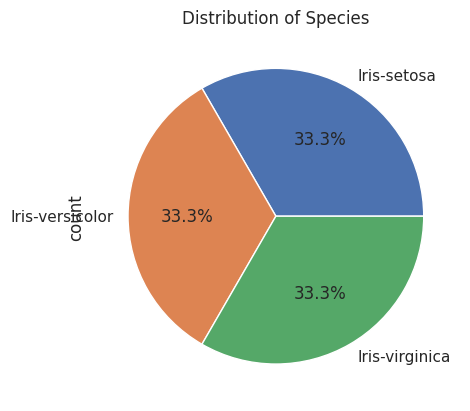

In [19]:
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']
plt.title("Distribution of Species")
iris['Species'].value_counts().plot.pie(autopct="%1.1f%%");

In [20]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
means = iris.groupby('Species').mean()
means

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [39]:
def manhattan_distance(x1, y1, x2, y2):
  return abs(x2 -x1) + abs(y2 - y1)

def euclidean_distance(x1, y1, x2, y2):
  return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [41]:
from itertools import combinations

means['Manhattan'] = 0.0
means['Euclidean'] = 0.0

# Calculate distances
species = means.index.tolist()
for i, j in combinations(species, 2):
    man_dist = manhattan_distance(means.loc[i, 'SepalLengthCm'], means.loc[i, 'SepalWidthCm'],
                                  means.loc[j, 'SepalLengthCm'], means.loc[j, 'SepalWidthCm']) + \
               manhattan_distance(means.loc[i, 'PetalLengthCm'], means.loc[i, 'PetalWidthCm'],
                                  means.loc[j, 'PetalLengthCm'], means.loc[j, 'PetalWidthCm'])

    euc_dist = euclidean_distance(means.loc[i, 'SepalLengthCm'], means.loc[i, 'SepalWidthCm'],
                                  means.loc[j, 'SepalLengthCm'], means.loc[j, 'SepalWidthCm']) + \
               euclidean_distance(means.loc[i, 'PetalLengthCm'], means.loc[i, 'PetalWidthCm'],
                                  means.loc[j, 'PetalLengthCm'], means.loc[j, 'PetalWidthCm'])

    means.loc[i, 'Manhattan'] = man_dist
    means.loc[j, 'Manhattan'] = man_dist
    means.loc[i, 'Euclidean'] = euc_dist
    means.loc[j, 'Euclidean'] = euc_dist

means

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Manhattan,Euclidean
Species,,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,7.896,6.102639
Iris-versicolor,5.936,2.770,4.260,1.326,2.848,2.152613
Iris-virginica,6.588,2.974,5.552,2.026,2.848,2.152613


          Species1         Species2  Manhattan  Euclidean
0      Iris-setosa  Iris-versicolor      5.456   4.131548
1      Iris-setosa   Iris-virginica      7.896   6.102639
2  Iris-versicolor   Iris-virginica      2.848   2.152613


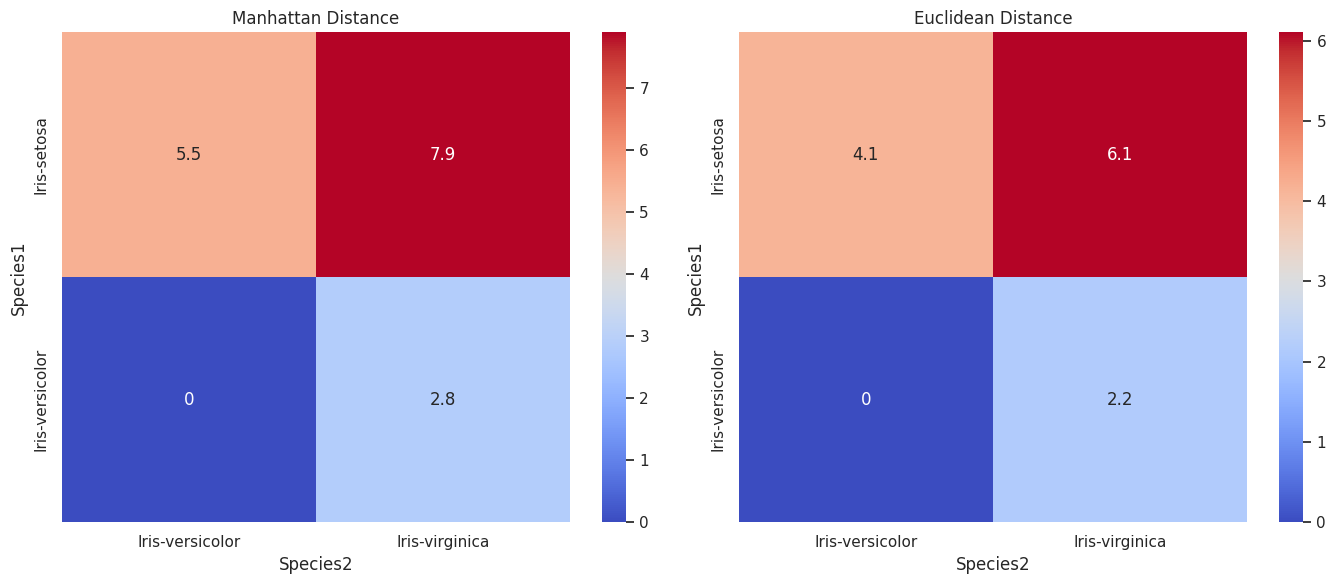

In [52]:
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

distance_data = {
    'Species1': [],
    'Species2': [],
    'Manhattan': [],
    'Euclidean': []
}

# Calculate distances between each pair of species
species = means.index.tolist()
for i, j in combinations(species, 2):
    man_dist = manhattan_distance(means.loc[i, 'SepalLengthCm'], means.loc[i, 'SepalWidthCm'],
                                  means.loc[j, 'SepalLengthCm'], means.loc[j, 'SepalWidthCm']) + \
               manhattan_distance(means.loc[i, 'PetalLengthCm'], means.loc[i, 'PetalWidthCm'],
                                  means.loc[j, 'PetalLengthCm'], means.loc[j, 'PetalWidthCm'])

    euc_dist = euclidean_distance(means.loc[i, 'SepalLengthCm'], means.loc[i, 'SepalWidthCm'],
                                  means.loc[j, 'SepalLengthCm'], means.loc[j, 'SepalWidthCm']) + \
               euclidean_distance(means.loc[i, 'PetalLengthCm'], means.loc[i, 'PetalWidthCm'],
                                  means.loc[j, 'PetalLengthCm'], means.loc[j, 'PetalWidthCm'])

    distance_data['Species1'].append(i)
    distance_data['Species2'].append(j)
    distance_data['Manhattan'].append(man_dist)
    distance_data['Euclidean'].append(euc_dist)

distance_df = pd.DataFrame(distance_data)
print(distance_df.head())
# Create a pivot table for the heatmap
manhattan_pivot = distance_df.pivot_table(index='Species1', columns='Species2', values='Manhattan')
euclidean_pivot = distance_df.pivot_table(index='Species1', columns='Species2', values='Euclidean')

# # Fill diagonal and upper triangle with zeros for a symmetrical heatmap
manhattan_pivot = manhattan_pivot.fillna(0)
euclidean_pivot = euclidean_pivot.fillna(0)

# Plot heatmaps
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(manhattan_pivot, annot=True, cmap='coolwarm')
plt.title('Manhattan Distance')

plt.subplot(1, 2, 2)
sns.heatmap(euclidean_pivot, annot=True, cmap='coolwarm')
plt.title('Euclidean Distance')

plt.tight_layout()
plt.show()

                     PCA1      PCA2
Species                            
Iris-setosa      4.050346 -0.296181
Iris-versicolor -1.229421  1.278752
Iris-virginica  -2.820924 -0.982572


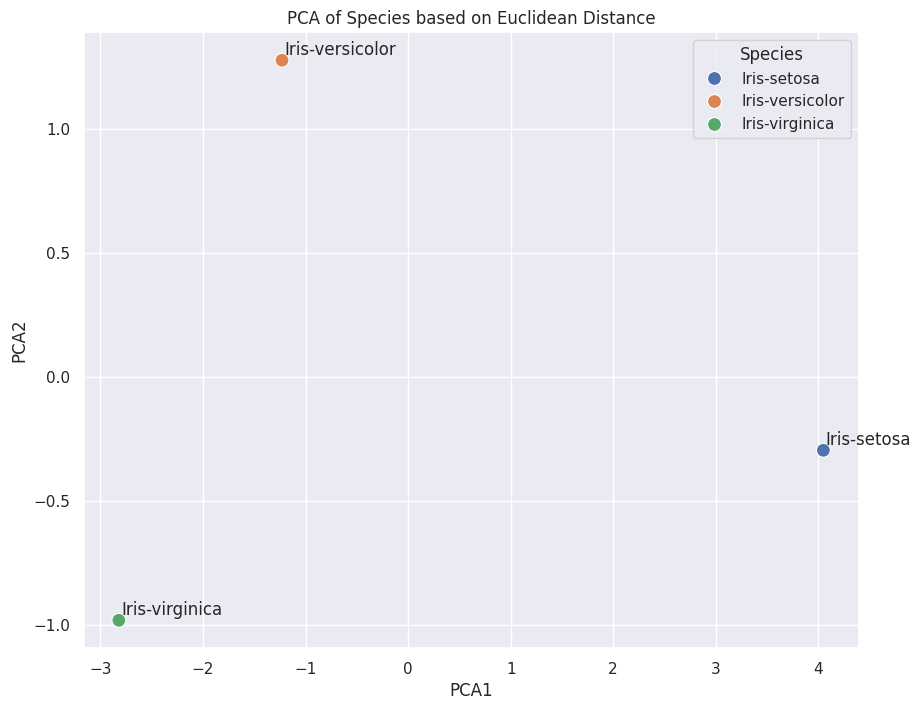

In [58]:
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

means = iris.groupby('Species').mean()

# Calculate the distance matrix (Euclidean in this example)
dist_matrix = pdist(means, metric='euclidean')
dist_matrix_square = squareform(dist_matrix)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dist_matrix_square)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, index=means.index, columns=['PCA1', 'PCA2'])
print(pca_df.head())

# Plot the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, hue=pca_df.index, s=100)

# Annotate the points with species names
for i in range(pca_df.shape[0]):
    plt.text(pca_df.PCA1[i] + 0.02, pca_df.PCA2[i] + 0.02, pca_df.index[i], fontsize=12)

plt.title('PCA of Species based on Euclidean Distance')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Species')
plt.show()

                     PCA1      PCA2
Species                            
Iris-setosa      6.737638 -0.504341
Iris-versicolor -2.072022  2.217436
Iris-virginica  -4.665616 -1.713095


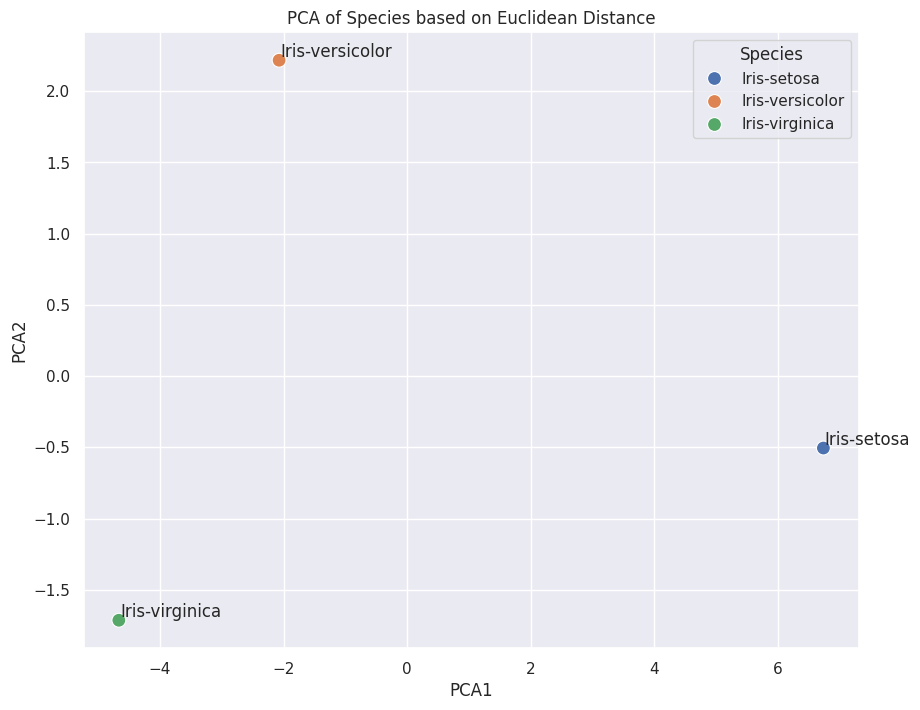

In [61]:
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

means = iris.groupby('Species').mean()

# Calculate the distance matrix (Manhattan in this example)
dist_matrix = pdist(means, metric='cityblock')
dist_matrix_square = squareform(dist_matrix)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dist_matrix_square)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, index=means.index, columns=['PCA1', 'PCA2'])
print(pca_df.head())

# Plot the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, hue=pca_df.index, s=100)

# Annotate the points with species names
for i in range(pca_df.shape[0]):
    plt.text(pca_df.PCA1[i] + 0.02, pca_df.PCA2[i] + 0.02, pca_df.index[i], fontsize=12)

plt.title('PCA of Species based on Euclidean Distance')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Species')
plt.show()